In [1]:
cd D:\DATA SCIENCE PROJECTS\DATASETS

D:\DATA SCIENCE PROJECTS\DATASETS


In [5]:
# import libraries
import numpy as np
import pandas as pd

In [6]:
clinical_records=pd.read_csv("heart_failure_clinical_records_dataset.csv")
clinical_records.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
clinical_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [28]:
clinical_records.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


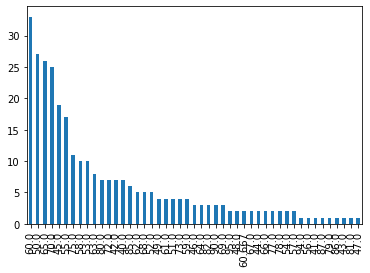

In [29]:
clinical_records['age'].value_counts().plot(kind='bar')

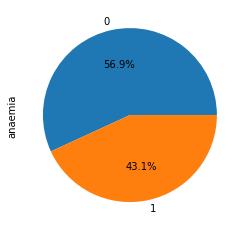

In [34]:
clinical_records["anaemia"].value_counts().plot(kind='pie',autopct='%1.1f%%')

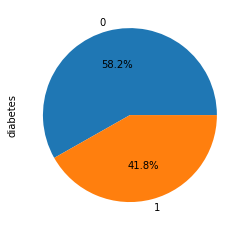

In [33]:
clinical_records["diabetes"].value_counts().plot(kind='pie',autopct='%1.1f%%')

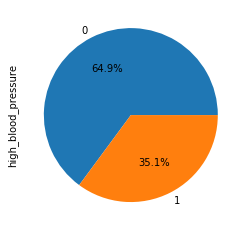

In [35]:
clinical_records["high_blood_pressure"].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Correlations

In [8]:
corr_matrix=clinical_records.corr()
corr_matrix["DEATH_EVENT"].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

In [9]:
y=clinical_records["DEATH_EVENT"]

In [10]:
new_x=clinical_records[['age','ejection_fraction','serum_sodium','time']]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(new_x,y,test_size=0.2,random_state=2698)

In [14]:
X_train

,age,ejection_fraction,serum_sodium,time
282,42.0,30,128,250
246,55.0,25,138,214
58,49.0,20,136,55
84,59.0,25,141,78
233,53.0,38,137,209
...,...,...,...,...
199,60.0,35,113,186
195,77.0,45,145,180
280,70.0,40,137,247
9,80.0,35,133,10


# Models



# Logistic Regression


In [16]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train,y_train)
log_pred=log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,log_pred))

0.8666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest_clf=RandomForestClassifier(random_state=5)
forest_clf.fit(X_train,y_train)
forest_pred=forest_clf.predict(X_test)
accuracy_score(y_test,forest_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.95

# Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
gradientboost_clf=GradientBoostingClassifier(max_depth=1)
gradientboost_clf.fit(X_train,y_train)
gradientboost_pred=gradientboost_clf.predict(X_test)
accuracy_score(y_test,gradientboost_pred)

0.9

# SVM

In [27]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svc_pred=svm.predict(X_test)
accuracy_score(y_test,svc_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7833333333333333

# AdaBoost

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200,algorithm="SAMME.R",learning_rate=0.3)
ada_clf.fit(X_train,y_train)
ada_pred=ada_clf.predict(X_test)
accuracy_score(y_test,ada_pred)

0.9333333333333333

Final Results

Logistic Regression:86.66%
Random Forest      : 95%
Gradient Boost     :90%
SVM                :78.33%
Ada Boost          :93.33% 
